<a href="https://colab.research.google.com/github/JoDeMiro/LuaLisa/blob/main/Lua_Lisa_02_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import sklearn
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

from copy import deepcopy

from skimage.draw import ellipse


In [ ]:
id = np.arange(0, 1, 0.1)
id = np.linspace(0, 1, 100)
beta = 3
y1 = np.sin(id) * beta
y2 = np.sin(id * beta)

print(id.shape)
print(y1.shape)

(100,)
(100,)


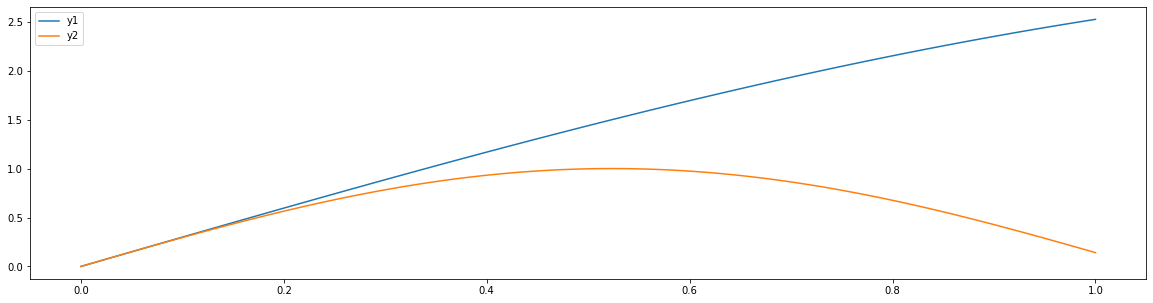

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(id, y1, label='y1')
plt.plot(id, y2, label='y2')
plt.legend()
plt.show()

(100, 1)
(100,)


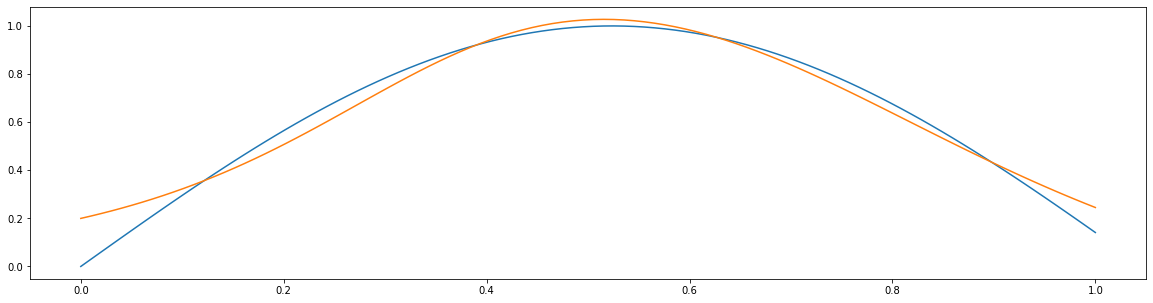

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(3,2),
                   activation='tanh',
                   solver='adam',
                   batch_size=100,
                   learning_rate_init=0.1,
                   max_iter=200,
                   shuffle=True,
                   random_state=1)

def sin(id = None, beta = None):
  sinus = id * beta
  return beta

input = id.reshape(-1,1)
target = y2
print(input.shape)
print(target.shape)

mlp.fit(input, target)

pred = mlp.predict(input)

plt.figure(figsize=(20, 5))
plt.plot(id, y2, label='y2')
plt.plot(id, pred, label='pred')
plt.show()

## Evoluciós módszerrel keressük a megfelelő paramtéert

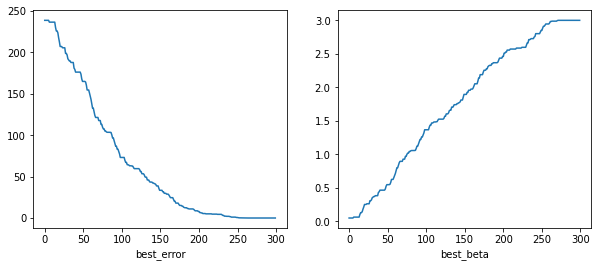

In [ ]:
def lathatatlan_fuggveny(id, beta):
  return np.sin(id) * beta

id = np.linspace(0, 1, 100)

beta_amit_keresünk = 3
y1 = lathatatlan_fuggveny(id, beta_amit_keresünk)

decay = 0.1

best_beta_holder  = []
best_error_holder = []
best_beta  = 0
best_error = 99999999
for i in range(300):
  current_beta = best_beta + ((-0.5 + np.random.random()) * decay)
  pred  = lathatatlan_fuggveny(id, current_beta)
  error = np.sum((pred-y1)**2)
  error = float(error)
  if error < best_error:
    best_beta = current_beta
    best_error = error
  best_error_holder.append(best_error)
  best_beta_holder.append(best_beta)
  # print('best_error = {:.3}, best_beta = {:.2} '.format(best_error, best_beta))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(best_error_holder)
ax1.set_xlabel('best_error')
ax2.plot(best_beta_holder)
ax2.set_xlabel('best_beta')
plt.show()

In [ ]:
np.random.random()

0.2311758331593935

## Lua Lisa

<class 'numpy.ndarray'>
(444, 788, 3)
min 5 and max 227
uint8
uint8


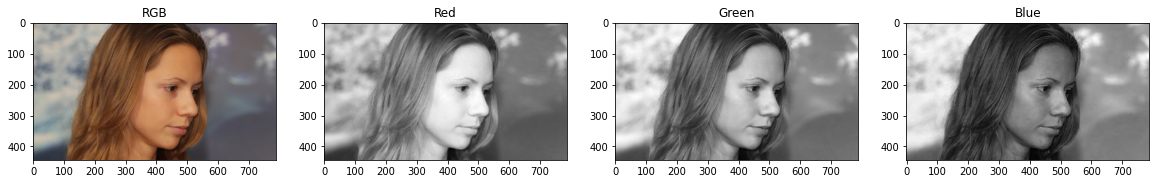

In [ ]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman4.jpg')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

print('min {} and max {}'.format(red1.min(), red1.max()))
print(pic1.dtype)
print(red1.dtype)

plt.show()

min 0.054901960784313725 and max 2.2627450980392156


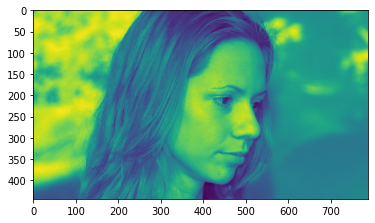

In [ ]:
r = red1.astype('float64')
g = green1.astype('float64')
b = blue1.astype('float64')

gray = (r + g + b).astype('float64')

gray = gray/255.0
print('min {} and max {}'.format(gray.min(), gray.max()))
plt.imshow(gray)

## Pilot

w: 788 h: 444
rr.shape =  (7825,)
cc.shape =  (7825,)
rr.max() =  149
cc.max() =  249
err: 625961.4909188775


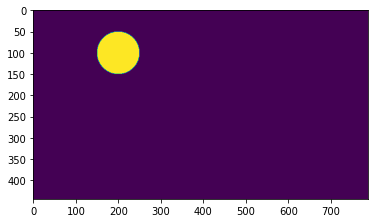

In [ ]:
# csak simán dobáljunk rá köröket -> rendereljük le a képet -> tegyük át mátrix formába és számoljuk ki a képpontonkénti hiba mértékét

height, width = gray.shape[0], gray.shape[1]

print('w:', width, 'h:', height)

empty_img = np.zeros((height, width), dtype=np.float64)

_r = 100
_c = 200
_rr = _cr = 50
_value = 0.4

rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)
empty_img[rr, cc] = _value

print('rr.shape = ', rr.shape)
print('cc.shape = ', cc.shape)
print('rr.max() = ', rr.max())
print('cc.max() = ', cc.max())

plt.imshow(empty_img)

def calc_distace(original_image, created_image):
  err = np.sum((original_image - created_image)**2)
  return err

err = calc_distace(gray, empty_img)
print('err:', err)

## Pilot Cont. 1

w: 788 h: 444
------------------- init_solution -----------------
-------------- Init solution info ---------------
len(intialized_solution) 10
type(intialized_solution[0]) <class 'dict'>
dict_keys(['_r', '_c', '_rr', '_cr', '_value'])
-------------------------------------------------
ellenőrizzük le az initial solutiont


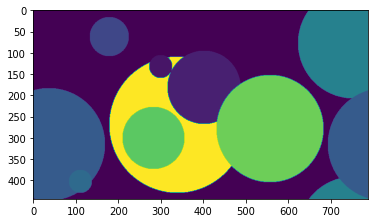

-------------------------------------------------
G 0 S 0   = 414455.6047267242
Found Better Solution in Generateion 0 at Solution 0
G 0 S 1   = 400142.0907950607
Found Better Solution in Generateion 0 at Solution 1
G 0 S 2   = 390769.45825871837
Found Better Solution in Generateion 0 at Solution 2
G 0 S 3   = 376223.5933732697
Found Better Solution in Generateion 0 at Solution 3
G 0 S 4   = 371073.7733293702
Found Better Solution in Generateion 0 at Solution 4
G 1 S 0   = 362343.7771925656
Found Better Solution in Generateion 1 at Solution 0
G 1 S 1   = 351726.5244085502
Found Better Solution in Generateion 1 at Solution 1
G 1 S 2   = 346379.56161094154
Found Better Solution in Generateion 1 at Solution 2
G 1 S 3   = 341250.7170209884
Found Better Solution in Generateion 1 at Solution 3
G 1 S 4   = 325414.12714098854
Found Better Solution in Generateion 1 at Solution 4
G 2 S 0   = 320885.5314655761
Found Better Solution in Generateion 2 at Solution 0
G 2 S 1   = 312306.31306352204
Fou

In [ ]:
# csak simán dobáljunk rá köröket -> rendereljük le a képet -> tegyük át mátrix formába és számoljuk ki a képpontonkénti hiba mértékét

# Get shape of original image
height, width = gray.shape[0], gray.shape[1]
print('w:', width, 'h:', height)

# ------- Circle parameters -------------
_number_of_cirles = 10
_min_circle_radius = 20
_max_circle_radius = 200

# ------- Evoltuion paramters -----------
_generation = 3
_population = 5

_rf_r = 10                                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval
_rf_c = 10                                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval
_rf_rr = 3                                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval


# ------- Segéd függvény a hibához ------
def calc_distace(original_image, created_image):
  err = np.sum((original_image - created_image)**2)
  return err

# ------- Segéd függvény az ábrához ----
def show_solution(solution):
  p_img = np.zeros((height, width), dtype=np.float64)

  # Menjünk végig az összes körön
  for circle in solution:
    _r = circle.get('_r')
    _c = circle.get('_c')
    _rr = _cr = circle.get('_rr')
    _value = circle.get('_value')

    rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

    # ha kilóg a képből akkor le kell vágni
    rr[rr >= height] = height-1                   # <-- a row a magasság
    cc[cc >= width] = width-1                     # <-- a col a szélesség

    p_img[rr, cc] = _value                        # <-- adjuk hozzá a kört a képhez

  plt.imshow(p_img); plt.show()                   # <-- show image

  return p_img



# ------- Create initial solution -------
def init_solution(_number_of_cirles, _min_circle_radius, _max_circle_radius):
  print('------------------- init_solution -----------------')
  solution = []
  individum = {}
  for i in range(_number_of_cirles):
    _r = np.random.randint(low = 0, high = height-2)    # <-- 788
    _c = np.random.randint(low = 0, high = width-2)     # <-- 0-444
    _rr = _cr = np.random.randint(low = _min_circle_radius, high = _max_circle_radius)
    _value = np.random.rand()                           # <-- 0-1
    individum = {'_r': _r, '_c': _c, '_rr': _rr, '_cr': _cr, '_value': _value}
    solution.append(individum)

  return solution

# Hozzuk létre a kiinduló populációt
intialized_solution = init_solution(_number_of_cirles = _number_of_cirles, 
                                    _min_circle_radius = _min_circle_radius,
                                    _max_circle_radius = _max_circle_radius)

print('-------------- Init solution info ---------------')
print('len(intialized_solution)', len(intialized_solution))
print('type(intialized_solution[0])', type(intialized_solution[0]))
print(intialized_solution[0].keys())
print('-------------------------------------------------')
print('ellenőrizzük le az initial solutiont')
show_solution(intialized_solution)
print('-------------------------------------------------')


# ------- Start evolution --------------

best_solution = deepcopy(intialized_solution)
best_error = 999999999999.0
best_img = None

for g in range(_generation):

  # olvassuk be a solutiont -> mutáljuk -> és csináljuk meg ez a alpján a becslést
  
  for p in range(_population):

    p_img = np.zeros((height, width), dtype=np.float64)

    current_solution = []
    individum = {}

    # Menjünk végig az összes körön
    for circle in best_solution:
      _r = circle.get('_r') + np.random.randint(low = -_rf_r, high = _rf_r)
      _c = circle.get('_c') + np.random.randint(low = -_rf_c, high = _rf_c)
      _rr = _cr = circle.get('_rr') + np.random.randint(low = -_rf_rr, high = _rf_rr)
      _value = circle.get('_value') + np.random.rand() * 0.1                        # <-- ez is egy paraméter de most fixen hagyom

      # ugyan úgy hozzá kell adnom a egy solution-höz ha utána ki akarom mentei
      individum = {'_r': _r, '_c': _c, '_rr': _rr, '_cr': _cr, '_value': _value}
      current_solution.append(individum)

      rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

      # ha kilóg a képből akkor le kell vágni
      rr[rr >= height] = height-1                   # <-- a row a magasság
      cc[cc >= width] = width-1                     # <-- a col a szélesség

      # adjuk hozzá a kört a képhez
      p_img[rr, cc] = _value


    # Ha meg van az összes kör a képen, akkor számoljuk ki az eredményt
    err = calc_distace(gray, p_img)
    print('G {} S {}   = {}'.format(g, p, err))

    # Ha ez a hiba jobb mint eddig bármi akkor adjuk hozzá, már generáción belül (igen ez hiba de most nem érdekel)
    if ( err < best_error ):
      best_error = err
      best_solution = deepcopy(current_solution)
      print('Found Better Solution in Generateion {} at Solution {}'.format(g, p))
      best_img = p_img                              # <-- ToDo: lehet, hogy Deepcopyzni kell

# ---------------------------- VÉGE AZ EVOLUCIÓNAK -----------------------------

# plt.imshow(best_img)

# ---------------------------- VÉGE AZ PROGRAMNAK ------------------------------






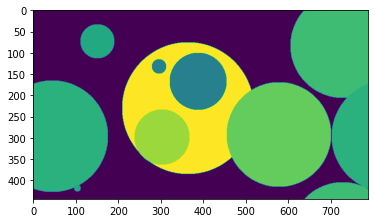

In [ ]:
plt.imshow(best_img)
plt.show()

_r: 420 _c: 33
_r: 403 _c: 608
_r: 420 _c: 662
_r: 44 _c: 369
_r: 214 _c: 273
_r: 101 _c: 622
_r: 407 _c: 785
_r: 92 _c: 660
_r: 306 _c: 683
_r: 284 _c: 733
err: 500173.93855036405


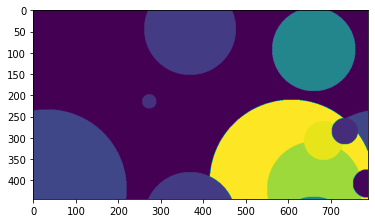

In [ ]:



# ------------------------------------------------------------------------------

# Ez alapján kezdtem el csinálni.
# Ez egyetlen megoldás alapján visszaadja az eredményt

# Create new empty image with same size
empty_img = np.zeros((height, width), dtype=np.float64)

for i in range(_number_of_cirles):
  _r = np.random.randint(low = 0, high = height-2)    # <-- 788
  _c = np.random.randint(low = 0, high = width-2)     # <-- 0-444
  print('_r:', _r, '_c:', _c)
  _rr = _cr = 50
  _rr = _cr = np.random.randint(low = _min_circle_radius, high = _max_circle_radius)
  _value = np.random.rand()                     # <-- 0-1

  rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

  # ha kilóg a képből akkor le kell vágni
  rr[rr >= height] = height-1                   # <-- a row a magasság
  cc[cc >= width] = width-1                     # <-- a col a szélesség

  # adjuk hozzá a kört a képhez
  empty_img[rr, cc] = _value

plt.imshow(empty_img)

def calc_distace(original_image, created_image):
  err = np.sum((original_image - created_image)**2)
  return err

err = calc_distace(gray, empty_img)
print('err:', err)
